# Project 4 - Virus Prediction

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
from math import sin, cos, sqrt, atan2, radians


%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)

## Data Cleaning and preprocessing

### Weather

Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level

Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

In [131]:
df_weather = pd.read_csv('../assets/weather.csv')

In [132]:
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [133]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

In [138]:
df_weather[(df_weather['Date']=='2013-07-19') & (df_weather['Station']==1)]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
2366,1,2013-07-19,96,71,84,10,70,75,0,19,0433,1923,TS BR,0,M,0.0,0.58,29.10,29.83,13.3,25,14.0


In [139]:
df_weather[(df_weather['Date']=='2013-09-06') & (df_weather['Station']==1)]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
2464,1,2013-09-06,86,57,72,5,58,64,0,7,0522,1819,,0,M,0.0,0.00,29.38,30.11,4.7,20,6.0


### Spray

In [90]:
df_spray = pd.read_csv('../assets/spray.csv')

In [91]:
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [92]:
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [93]:
df_spray['Date'] = pd.to_datetime(df_spray['Date'])

In [94]:
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null datetime64[ns]
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 463.7+ KB


In [96]:
df_spray['index'] = df_spray.index

### Train

In [52]:
df_tr = pd.read_csv('../assets/train.csv')

In [53]:
df_tr.shape

(10506, 12)

In [54]:
df_tr.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [85]:
df_tr['Species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [59]:
df_tr['Date'] = pd.to_datetime(df_tr['Date'])

In [95]:
df_tr['index'] = df_tr.index

### Test

In [71]:
df_tst = pd.read_csv('../assets/test.csv')

In [72]:
df_tst.shape

(116293, 11)

In [73]:
df_tst['Date'] = pd.to_datetime(dr_tst['Date'])

In [88]:
df_tst['Species'].value_counts()

CULEX PIPIENS/RESTUANS    15359
CULEX RESTUANS            14670
CULEX PIPIENS             14521
CULEX SALINARIUS          14355
CULEX TERRITANS           14351
CULEX TARSALIS            14347
UNSPECIFIED CULEX         14345
CULEX ERRATICUS           14345
Name: Species, dtype: int64

In [ ]:
#df_tst_full

### Combined dataset

In [50]:
df_tr_full = pd.read_csv('../assets/df_tr_full.csv') 

In [51]:
df_tr_full.head()

,Date,month,year,Block,Latitude,Longitude,Street,Trap,Tmax,Tmin,Tavg,DewPoint,dew_point_depression,WetBulb,wet_bulb_depression,Heat,Cool,relative_humidity,Sunrise,Sunset,daytime,Species,WnvPresent,PrecipTotal,StnPressure,ResultSpeed,ResultDir,VCTS,RA,HZ,BR,FG,DZ,TSRA,TS
0,2007-05-29,5,2007,41,41.954690,-87.800991,N OAK PARK AVE,T002,88,60,74.0,58,16.0,65.0,9.0,0.0,9.0,57,0 days 04:21:00.000000000,0 days 19:17:00.000000000,0 days 14:56:00.000000000,CULEX PIPIENS/RESTUANS,0.0,0.0,29.39,5.8,18,0,0,1,1,0,0,0,0
1,2007-05-29,5,2007,41,41.954690,-87.800991,N OAK PARK AVE,T002,88,60,74.0,58,16.0,65.0,9.0,0.0,9.0,57,0 days 04:21:00.000000000,0 days 19:17:00.000000000,0 days 14:56:00.000000000,CULEX RESTUANS,0.0,0.0,29.39,5.8,18,0,0,1,1,0,0,0,0
2,2007-05-29,5,2007,62,41.994991,-87.769279,N MANDELL AVE,T007,88,60,74.0,58,16.0,65.0,9.0,0.0,9.0,57,0 days 04:21:00.000000000,0 days 19:17:00.000000000,0 days 14:56:00.000000000,CULEX RESTUANS,0.0,0.0,29.39,5.8,18,0,0,1,1,0,0,0,0
3,2007-05-29,5,2007,79,41.974089,-87.824812,W FOSTER AVE,T015,88,60,74.0,58,16.0,65.0,9.0,0.0,9.0,57,0 days 04:21:00.000000000,0 days 19:17:00.000000000,0 days 14:56:00.000000000,CULEX PIPIENS/RESTUANS,0.0,0.0,29.39,5.8,18,0,0,1,1,0,0,0,0
4,2007-05-29,5,2007,79,41.974089,-87.824812,W FOSTER AVE,T015,88,60,74.0,58,16.0,65.0,9.0,0.0,9.0,57,0 days 04:21:00.000000000,0 days 19:17:00.000000000,0 days 14:56:00.000000000,CULEX RESTUANS,0.0,0.0,29.39,5.8,18,0,0,1,1,0,0,0,0


In [7]:
df_tr_full.shape

(10506, 35)

In [58]:
df_tr_full["Date"] = pd.to_datetime(df_tr_full['Date'])

## EDA

### Weather

In [148]:
df_weather_range = df_weather[(df_weather['Date'] >= '2013-07-19') & (df_weather['Date'] <= '2013-09-06')\
                             & (df_weather['Station']==1)]

In [163]:
df_weather_range.sort_values('Date', ascending=True, inplace=True)

/Users/clementow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [174]:
df_weather_range.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
2366,1,2013-07-19,96,71,84,10,70,75,0,19,0433,1923,TS BR,0,M,0.0,0.58,29.10,29.83,13.3,25,14.0
2368,1,2013-07-20,89,71,80,6,64,69,0,15,0433,1923,,0,M,0.0,0.06,29.17,29.86,4.8,1,7.5
2370,1,2013-07-21,88,68,78,4,65,69,0,13,0434,1922,,0,M,0.0,0.01,29.18,29.89,2.8,7,6.7
2372,1,2013-07-22,87,71,79,5,66,71,0,14,0435,1921,TSRA RA,0,M,0.0,T,29.07,29.78,4.9,24,7.4
2374,1,2013-07-23,78,63,71,-3,60,64,0,6,0436,1920,,0,M,0.0,0.03,29.15,29.83,8.8,2,11.0


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed


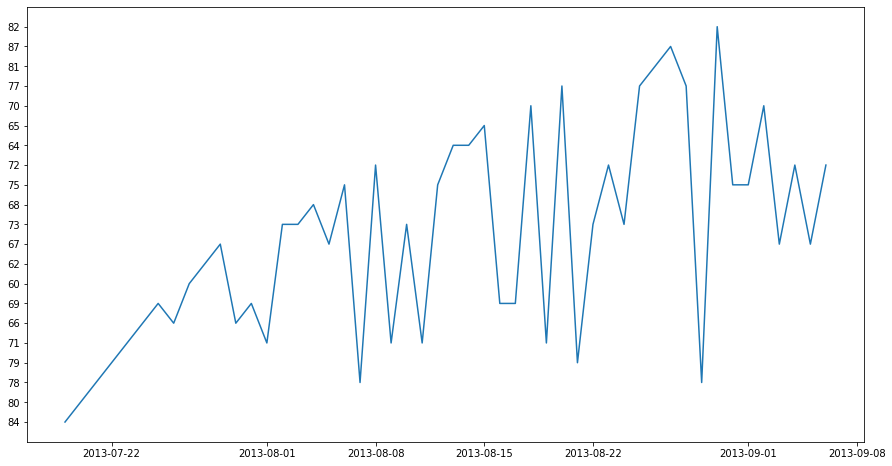

In [185]:
plt.figure(figsize=(15,8))
plt.plot(df_weather_range['Date'], df_weather_range['Tavg'])

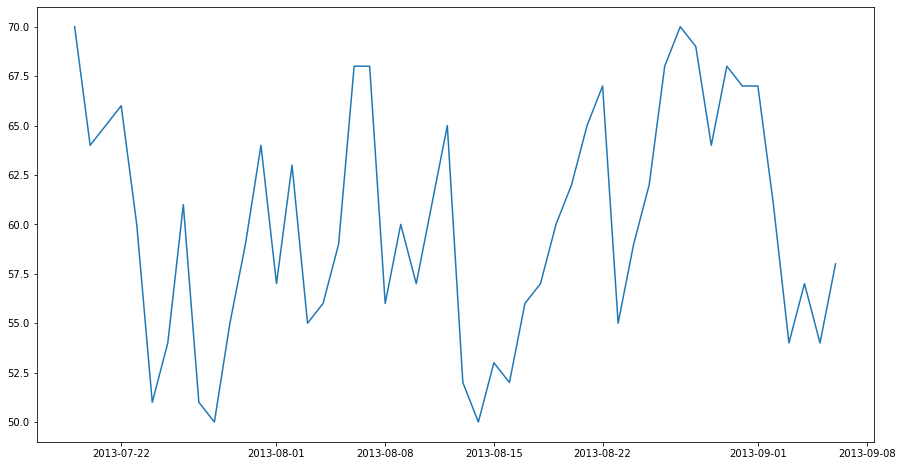

In [177]:
plt.figure(figsize=(15,8))
plt.plot(df_weather_range['Date'], df_weather_range['DewPoint'])

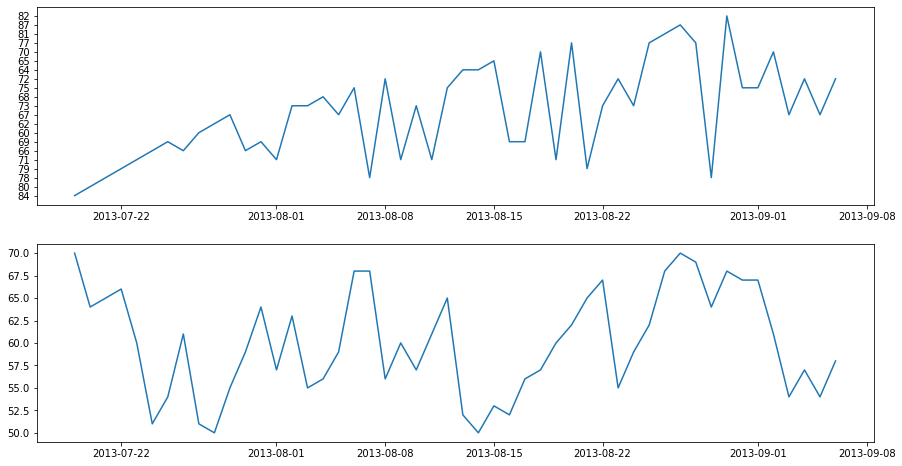

In [202]:
fig, ax = plt.subplots(2, figsize=(15,8))
ax[0].plot(df_weather_range['Date'], df_weather_range['Tavg'])
ax[1].plot(df_weather_range['Date'], df_weather_range['DewPoint'])

### Weather station distance to observations - Clement

Since there are two weather stations where for the same date there are two observations, we have to see which weather station is nearer to the observations. This is so that the weather is most accurate.

In [6]:
def calc_dist_chk(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    #formula calc distance between two points 
    #haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    #distance in km
    distance = R * c

    return round(distance, 4)

In [34]:
def check_dist_station(df):
    #checking distance from station
    #stations lat lng
    station1_wea = (41.995, -87.933)
    station2_wea = (41.786, -87.752)
    nearest_station1_list = []

    for i  in range(df.shape[0]): #loop thru data
        train_date = df.loc[i, :]['Date'] 
        train_lat = df.loc[i, 'Latitude']
        train_lon = df.loc[i, 'Longitude']
        dist_station1 = calc_dist_chk(station1_wea[0], station1_wea[1], train_lat, train_lon)
        dist_station2 = calc_dist_chk(station2_wea[0], station2_wea[1], train_lat, train_lon)
        if dist_station1 <= dist_station2:
            nearest_station1_list.append(1)
        else:
            nearest_station1_list.append(0)

        if i%1000 == 0:
            print(f"Loop {i}..")

    return nearest_station1_list

In [61]:
df_tr['near_sta1'] = check_dist_station(df_tr)

Loop 0..
Loop 1000..
Loop 2000..
Loop 3000..
Loop 4000..
Loop 5000..
Loop 6000..
Loop 7000..
Loop 8000..
Loop 9000..
Loop 10000..


In [62]:
df_tr.shape

(10506, 13)

In [81]:
df_tr['near_sta1'].value_counts()

0    7208
1    3298
Name: near_sta1, dtype: int64

__Save to CSV__

In [82]:
df_tr.to_csv('../assets/df_tr_weather_sta.csv')

In [74]:
df_tst['near_sta1'] = check_dist_station(df_tst)

Loop 0..
Loop 1000..
Loop 2000..
Loop 3000..
Loop 4000..
Loop 5000..
Loop 6000..
Loop 7000..
Loop 8000..
Loop 9000..
Loop 10000..
Loop 11000..
Loop 12000..
Loop 13000..
Loop 14000..
Loop 15000..
Loop 16000..
Loop 17000..
Loop 18000..
Loop 19000..
Loop 20000..
Loop 21000..
Loop 22000..
Loop 23000..
Loop 24000..
Loop 25000..
Loop 26000..
Loop 27000..
Loop 28000..
Loop 29000..
Loop 30000..
Loop 31000..
Loop 32000..
Loop 33000..
Loop 34000..
Loop 35000..
Loop 36000..
Loop 37000..
Loop 38000..
Loop 39000..
Loop 40000..
Loop 41000..
Loop 42000..
Loop 43000..
Loop 44000..
Loop 45000..
Loop 46000..
Loop 47000..
Loop 48000..
Loop 49000..
Loop 50000..
Loop 51000..
Loop 52000..
Loop 53000..
Loop 54000..
Loop 55000..
Loop 56000..
Loop 57000..
Loop 58000..
Loop 59000..
Loop 60000..
Loop 61000..
Loop 62000..
Loop 63000..
Loop 64000..
Loop 65000..
Loop 66000..
Loop 67000..
Loop 68000..
Loop 69000..
Loop 70000..
Loop 71000..
Loop 72000..
Loop 73000..
Loop 74000..
Loop 75000..
Loop 76000..
Loop 77000..

In [80]:
df_tst['near_sta1'].value_counts()

0    80892
1    35401
Name: near_sta1, dtype: int64

__Save to CSV__

In [83]:
df_tst.to_csv('../assets/df_tst_weather_sta.csv')

__Verification for distance__

In [45]:
df_tr.loc[:,['Date', 'month', 'year', 'Block', 'Latitude', 'Longitude', 'near_sta1']].head(10)

,Date,month,year,Block,Latitude,Longitude,near_sta1
0,2007-05-29,5,2007,41,41.954690,-87.800991,1
1,2007-05-29,5,2007,41,41.954690,-87.800991,1
2,2007-05-29,5,2007,62,41.994991,-87.769279,1
3,2007-05-29,5,2007,79,41.974089,-87.824812,1
4,2007-05-29,5,2007,79,41.974089,-87.824812,1
5,2007-05-29,5,2007,15,41.921600,-87.666455,0
6,2007-05-29,5,2007,25,41.891118,-87.654491,0
7,2007-05-29,5,2007,11,41.867108,-87.654224,0
8,2007-05-29,5,2007,11,41.867108,-87.654224,0
9,2007-05-29,5,2007,11,41.896282,-87.655232,0


In [46]:
station1_wea = (41.995, -87.933)
station2_wea = (41.786, -87.752)

In [47]:
calc_dist_chk(41.921600, -87.666455, station1_wea[0], station1_wea[1])

23.5101

In [48]:
calc_dist_chk(41.921600, -87.666455, station1_wea[0], station2_wea[1])

10.8038

### Check correlation between spray and WNV - Clement

The correlation between the spray data and the existence of the West Nile virus is a worthwhile topic to delve into. 

This is going by the assumption that the insectivide spray lasts for at most 2 days in the best weather conditions. 

In [128]:
#TO FIND POINTS THAT ARE WNVPRESENT AND COINCIDES WITH SPRAY DATES AT MOST 2 DAYS BEFORE
def find_spray_points(df, df_spray, WnvPresent=1):
    suspect_dates = {}
    val_dict = {}
    wnv_df = df[df['WnvPresent'] == WnvPresent].reset_index()

    for i  in range(wnv_df.shape[0]): #loop thru train data having WnvPresent
        wnv_date = wnv_df.loc[i, :]['Date'] 
        #get date two days vefore 
        twod_before = wnv_date - timedelta(days=2)
        wnv_lat = wnv_df.loc[i, 'Latitude']
        wnv_lon = wnv_df.loc[i, 'Longitude']

        #spray dates coincide with 1-2 days before wnv spotted
        spray_coincide = df_spray[(df_spray['Date'] >= twod_before) & (df_spray['Date'] < wnv_date)].reset_index()
        if spray_coincide.shape[0] > 0:
            for j in range(spray_coincide.shape[0]):
                spray_lat = spray_coincide.loc[j, 'Latitude']
                spray_lon = spray_coincide.loc[j, 'Longitude']
                #find spray points within 0.2km
                if calc_dist_chk(wnv_lat, wnv_lon, spray_lat, spray_lon) < 0.2:
                    suspect_dates[wnv_df.loc[i,'index']] = (wnv_df.loc[i,'Date'],\
                        calc_dist_chk(wnv_lat, wnv_lon, spray_lat, spray_lon), round(wnv_lat,4), round(wnv_lon, 4))
    
    #to get unique values
    for k, val in suspect_dates.items():
        if val not in val_dict.values():
            val_dict[k] = val
        
    return val_dict

In [129]:
#to find spray points that coincide with WnvPresent=1
find_spray_points(df_tr, df_spray, 1)

{8894: (Timestamp('2013-07-19 00:00:00'), 0.1736, 42.0083, -87.7779),
 10157: (Timestamp('2013-09-06 00:00:00'), 0.1984, 42.0099, -87.8073)}

As we can see that even though the insecticide was sprayed at most 2 days before, it did not stop the occurence of the West Nile Virus. 

In [121]:
df_tr[df_tr['index'] == 8894]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,near_sta1,index
8894,2013-07-19,"7000 North Moselle Avenue, Chicago, IL 60646, USA",CULEX PIPIENS/RESTUANS,70,N MOSELL AVE,T008,"7000 N MOSELL AVE, Chicago, IL",42.008314,-87.777921,9,50,1,1,8894


![wnv_spray1.png](../img/wnv_spray1.png)

In the first occurence, the insecticide was sprayed on July 17 2013 and 2 days after the mosquitos in that trap were tested positive for West Nile Virus. 

In [122]:
df_tr[df_tr['index'] == 10158]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,near_sta1,index
10158,2013-09-06,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,18,1,1,10158


![wnv_spray2.png](../img/wnv_spray2.png)

In [130]:
#to find spray points that coincide with WnvPresent=0
find_spray_points(df_tr, df_spray, 0)

{8862: (Timestamp('2013-07-19 00:00:00'), 0.1502, 41.733, -87.6496),
 8874: (Timestamp('2013-07-19 00:00:00'), 0.1135, 41.7232, -87.65),
 8893: (Timestamp('2013-07-19 00:00:00'), 0.1736, 42.0083, -87.7779)}

Conversely, when we check for 

In [124]:
df_tr[df_tr['index'] == 8862]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,near_sta1,index
8862,2013-07-19,"8900 South Carpenter Street, Chicago, IL 60620...",CULEX PIPIENS/RESTUANS,89,S CARPENTER ST,T159,"8900 S CARPENTER ST, Chicago, IL",41.732984,-87.649642,8,46,0,0,8862


![wnv0_spray1.png](../img/wnv0_spray1.png)

In [125]:
df_tr[df_tr['index'] == 8874]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,near_sta1,index
8874,2013-07-19,"South Vincennes Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S VINCENNES,T089,"1000 S VINCENNES, Chicago, IL",41.723195,-87.64997,5,3,0,0,8874


![wnv0_spray2.png](../img/wnv0_spray2.png)

In [126]:
df_tr[df_tr['index'] == 8893]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,near_sta1,index
8893,2013-07-19,"7000 North Moselle Avenue, Chicago, IL 60646, USA",CULEX PIPIENS/RESTUANS,70,N MOSELL AVE,T008,"7000 N MOSELL AVE, Chicago, IL",42.008314,-87.777921,9,28,0,1,8893


![wnv0_spray3.png](../img/wnv0_spray3.png)

### Correlation between weather time lag and WNV - Abi

## Modelling - Keith